in case you want this: 

Stakeholders:
a) C-suite employees (e.g., CEO, CFO, etc.) who will want to ensure profitability and lack of drain on the companies overall resources.

b) Potential new employees, especially those who will run this new division. Because it takes exceptional organizational skills and industry knowledge to run a movie studio, Microsoft will need to vie for that talent. Showing that they have researched the business problem and received valuable insights, will help lure in those most qualified to launch this new studio. Demonstrating that the company has taken the effort to attain these insights also shows qualified candidates that they can rely upon C-suite employees to provide necessary resources (e.g., money, physical resources, physical space and further talent.) In other words C-suite will be demonstrating their willingness to support this new division by taking the initiative to gather preliminary insights.

c) Potential writers, directors, cinematographers, etc. who will want to know that they if they sign on for individual or prolonged contracts, that theit work, talent and time won't be wasted by a studio that is ill-equipped to produce what they are working on.

In [1]:
import pandas as pd
import numpy as np
from ast import literal_eval
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

In [2]:
!ls ../zippedData/

bom.movie_gross.csv.gz       imdb.title.ratings.csv.gz
imdb.name.basics.csv.gz      rt.movie_info.tsv.gz
imdb.title.akas.csv.gz       rt.reviews.tsv.gz
imdb.title.basics.csv.gz     tmdb.movies.csv.gz
imdb.title.crew.csv.gz       tn.movie_budgets.csv.gz
imdb.title.principals.csv.gz


In [3]:
df_imdb_combined_prof = pd.read_csv('../imdb_combined_prof.csv')
#Reading in file cleaned by other group member.

In [4]:
df_imdb_combined_prof.head() #Data exploration

,Unnamed: 0,Unnamed: 0_x,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,...,ROI %,ROI $,year,month,inflation,worldwide_gross_inf,domestic_gross_inf,production_budget_inf,ROI $ Inf,ROI%_inf
0,180,5662,tt1137470,Accidental Love,Accidental Love,2015,100.0,"['Comedy', 'Romance']",4.1,7048.0,...,-0.994791,-25864564,2015,March,1.15,155751.40,0.00,29900000.0,-29744248.60,-99.479092
1,369,7302,tt1403241,Wolves,Wolves,2014,91.0,"['Action', 'Fantasy', 'Horror']",5.3,7312.0,...,-0.994725,-17905047,2014,November,1.15,109195.95,0.00,20700000.0,-20590804.05,-99.472483
2,169,5622,tt1125929,Love Ranch,Love Ranch,2010,117.0,"['Biography', 'Comedy', 'Drama']",5.6,2742.0,...,-0.994154,-24853851,2010,June,1.25,182686.25,172356.25,31250000.0,-31067313.75,-99.415404
3,472,9207,tt1545106,Vamps,Vamps,2012,92.0,"['Comedy', 'Horror', 'Romance']",5.2,8838.0,...,-0.994074,-15905188,2012,November,1.19,112826.28,3999.59,19040000.0,-18927173.72,-99.407425
4,436,8171,tt1486193,5 Days of War,5 Days of War,2011,113.0,"['Action', 'Drama', 'War']",5.6,13089.0,...,-0.992684,-11912207,2011,August,1.21,106229.53,21149.59,14520000.0,-14413770.47,-99.268392


In [5]:
df_imdb_combined_prof.columns #Data exploration

Index(['Unnamed: 0', 'Unnamed: 0_x', 'tconst', 'primary_title',
       'original_title', 'start_year', 'runtime_minutes', 'genres',
       'averagerating', 'numvotes', 'directors', 'writers', 'actor', 'actress',
       'archive_footage', 'archive_sound', 'cinematographer', 'composer',
       'director_pr', 'editor', 'producer', 'production_designer', 'self',
       'writer_pr', 'concat', 'Unnamed: 0_y', 'id', 'release_date', 'movie',
       'production_budget', 'domestic_gross', 'worldwide_gross', 'ROI %',
       'ROI $', 'year', 'month', 'inflation', 'worldwide_gross_inf',
       'domestic_gross_inf', 'production_budget_inf', 'ROI $ Inf', 'ROI%_inf'],
      dtype='object')

In [6]:
#Data exploration: finding null values within the feature I will explore.
df_imdb_combined_prof['genres'].isna().sum() 

4

In [7]:
#Data cleaning: dropping null values within the feature I will explore.
df_imdb_combined_prof.dropna(subset= ['genres'], inplace = True)

In [8]:
#convert to list type
df_imdb_combined_prof['genres'] = df_imdb_combined_prof['genres'].apply(literal_eval)
#using .explode
df_imdb_combined_prof_exploded = df_imdb_combined_prof.explode('genres')

In [9]:
df_imdb_combined_prof_exploded.head()

,Unnamed: 0,Unnamed: 0_x,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,...,ROI %,ROI $,year,month,inflation,worldwide_gross_inf,domestic_gross_inf,production_budget_inf,ROI $ Inf,ROI%_inf
0,180,5662,tt1137470,Accidental Love,Accidental Love,2015,100.0,Comedy,4.1,7048.0,...,-0.994791,-25864564,2015,March,1.15,155751.40,0.0,29900000.0,-29744248.60,-99.479092
0,180,5662,tt1137470,Accidental Love,Accidental Love,2015,100.0,Romance,4.1,7048.0,...,-0.994791,-25864564,2015,March,1.15,155751.40,0.0,29900000.0,-29744248.60,-99.479092
1,369,7302,tt1403241,Wolves,Wolves,2014,91.0,Action,5.3,7312.0,...,-0.994725,-17905047,2014,November,1.15,109195.95,0.0,20700000.0,-20590804.05,-99.472483
1,369,7302,tt1403241,Wolves,Wolves,2014,91.0,Fantasy,5.3,7312.0,...,-0.994725,-17905047,2014,November,1.15,109195.95,0.0,20700000.0,-20590804.05,-99.472483
1,369,7302,tt1403241,Wolves,Wolves,2014,91.0,Horror,5.3,7312.0,...,-0.994725,-17905047,2014,November,1.15,109195.95,0.0,20700000.0,-20590804.05,-99.472483


In [10]:
df_imdb_combined_prof_exploded['ROI_percent'] = df_imdb_combined_prof_exploded['ROI %']*100

In [11]:
df_imdb_combined_prof_exploded.describe()

,Unnamed: 0,Unnamed: 0_x,start_year,runtime_minutes,averagerating,numvotes,Unnamed: 0_y,id,production_budget,domestic_gross,...,ROI %,ROI $,year,inflation,worldwide_gross_inf,domestic_gross_inf,production_budget_inf,ROI $ Inf,ROI%_inf,ROI_percent
count,3512.000000,3512.000000,3512.000000,3500.000000,3472.000000,3.472000e+03,3512.000000,3512.000000,3.512000e+03,3.512000e+03,...,3512.000000,3.512000e+03,3512.000000,3512.000000,3.512000e+03,3.512000e+03,3.512000e+03,3.512000e+03,3512.000000,3512.000000
mean,699.828018,32490.938781,2013.938497,109.452571,6.425230,1.344752e+05,2115.374431,50.884681,5.319440e+07,6.679635e+07,...,2.702877,1.168992e+08,2013.938497,1.163331,1.968237e+08,7.737281e+07,6.172122e+07,1.351025e+08,270.287695,270.287695
std,414.491190,32138.326243,2.642181,18.043350,0.939395,1.723161e+05,1545.115968,28.696927,5.940104e+07,9.100674e+07,...,4.960406,2.105484e+08,2.642181,0.047998,2.908368e+08,1.045898e+08,6.873424e+07,2.415752e+08,496.040610,496.040610
min,1.000000,54.000000,2010.000000,4.000000,1.600000,5.000000e+00,1.000000,1.000000,2.500000e+04,0.000000e+00,...,-0.994791,-2.002376e+08,2010.000000,1.070000,1.062295e+05,0.000000e+00,2.875000e+04,-2.142543e+08,-99.479092,-99.479092
25%,340.000000,7073.000000,2012.000000,97.000000,5.800000,3.041000e+04,723.000000,26.000000,1.200000e+07,1.037856e+07,...,0.163484,1.766959e+06,2012.000000,1.140000,2.324749e+07,1.214395e+07,1.428000e+07,2.102681e+06,16.348439,16.348439
50%,695.500000,19743.000000,2014.000000,107.000000,6.500000,7.744000e+04,1913.000000,51.000000,3.000000e+07,3.636818e+07,...,1.384918,3.682407e+07,2014.000000,1.150000,8.413056e+07,4.268788e+07,3.510000e+07,4.307118e+07,138.491752,138.491752
75%,1060.000000,51570.000000,2016.000000,120.000000,7.100000,1.684660e+05,3354.000000,76.000000,7.000000e+07,8.272575e+07,...,3.243841,1.296302e+08,2016.000000,1.190000,2.374223e+08,9.553644e+07,8.199500e+07,1.527122e+08,324.384139,324.384139
max,1421.000000,145937.000000,2019.000000,180.000000,8.800000,1.841066e+06,5748.000000,100.000000,4.106000e+08,7.000596e+08,...,58.170677,1.748134e+09,2019.000000,1.250000,2.232466e+09,7.630649e+08,4.968260e+08,1.905466e+09,5817.067733,5817.067733


In [12]:
# avg_ROI_top3 = (ROI_by_genre.values[:3].sum())/3
# avg_ROI_all = 270
# percent_diff = ((avg_ROI_top3 - avg_ROI_all)/avg_ROI_all)*100
# percent_diff

In [13]:
genre_ROI = df_imdb_combined_prof_exploded.groupby('genres').ROI_percent
genre_ROI.describe()

,count,mean,std,min,25%,50%,75%,max
genres,,,,,,,,
Action,411.0,183.397307,266.165162,-99.472483,19.477223,125.463961,270.597441,3001.627558
Adventure,340.0,217.496676,239.308972,-99.205725,63.367452,167.750157,307.209375,1468.021855
Animation,97.0,282.592459,282.472013,-85.416172,95.303086,199.921813,345.300955,1468.021855
Biography,130.0,251.011227,446.260157,-99.415404,-25.516269,94.328534,317.034311,3001.627558
Comedy,472.0,243.816873,338.078218,-99.479092,44.017757,156.628634,328.459569,2617.924114
Crime,218.0,130.768016,222.054675,-98.279956,-19.581898,72.985255,207.680034,1543.458800
Documentary,42.0,253.274574,518.885043,-95.988800,-3.421200,124.417462,245.064645,2876.130200
Drama,663.0,249.504995,474.161479,-99.415404,-14.850720,106.440860,319.279478,4249.700800
Family,86.0,175.284280,256.565523,-85.416172,30.380347,110.610765,236.706486,1423.023560


In [14]:
genre_ROI

In [15]:
ROI_by_genre = df_imdb_combined_prof_exploded.groupby('genres').ROI_percent.agg('mean')
#ROI_by_genre.reset_index()
ROI_by_genre = ROI_by_genre.sort_values(ascending = False)
ROI_by_genre

genres
Horror         645.812169
Mystery        600.360445
Thriller       442.218883
Sci-Fi         293.010785
Romance        290.433065
Music          285.042698
Animation      282.592459
Musical        276.252407
Documentary    253.274574
Biography      251.011227
Drama          249.504995
Comedy         243.816873
Fantasy        233.090989
Adventure      217.496676
Action         183.397307
Family         175.284280
History        154.924390
Crime          130.768016
Sport          123.075451
Western        110.666887
War             41.110865
Name: ROI_percent, dtype: float64

In [16]:
avg_ROI_top3 = (ROI_by_genre.values[:3].sum())/3
avg_ROI_all = 270
percent_diff = ((avg_ROI_top3 - avg_ROI_all)/avg_ROI_all)*100
percent_diff

108.44339458104197

In [17]:
ROI_by_genre_year = df_imdb_combined_prof_exploded.groupby(['year','genres']).ROI_percent.agg('mean')
ROI_by_genre_year

year  genres   
2010  Action       137.226778
      Adventure    214.250419
      Animation    268.647536
      Biography    189.884031
      Comedy       148.570491
                      ...    
2019  Music        164.982256
      Mystery      403.673586
      Romance      436.300083
      Sci-Fi       271.590378
      Thriller     576.960967
Name: ROI_percent, Length: 195, dtype: float64

In [18]:
# df_Mystery = df_imdb_combined_prof_exploded[df_imdb_combined_prof_exploded['genres']=='Mystery']
# df_Mystery = df_Mystery.sort_values('ROI_percent', ascending = False)
# df_Mystery = df_Mystery[['original_title', 'ROI_percent', 'start_year']]
# #df_Mystery = df_Mystery.groupby(['original_title', 'start_year']).ROI_percent.agg('mean')
# df_Mystery_sorted = df_Mystery.sort_values(by = 'ROI_percent', ascending = False)
# print(df_Mystery_sorted['ROI_percent'].describe())
# df_Mystery_sorted[:50].reset_index()
# #df_Mystery_sorted.loc[:]

Text(0, 0.5, 'Genres')

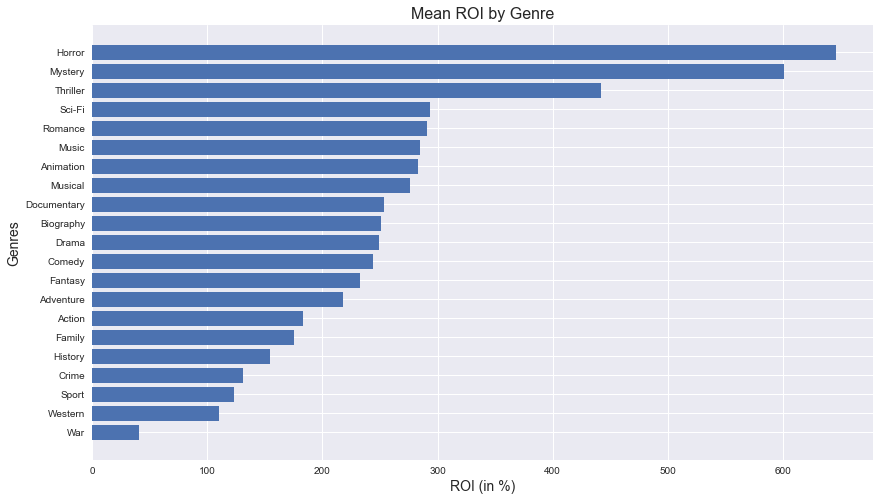

In [19]:
fig, ax = plt.subplots(figsize = (14,8))

y = ROI_by_genre.index
x = ROI_by_genre.values
ax.barh(y = y, width = x)
ax.invert_yaxis()

ax.set_title('Mean ROI by Genre', fontsize=16)
ax.set_xlabel('ROI (in %)', fontsize=14)
ax.set_ylabel('Genres', fontsize=14)

In [20]:
ROI_by_genre_year = df_imdb_combined_prof_exploded.groupby(['year','genres']).ROI_percent.agg('mean')
ROI_by_genre_year

year  genres   
2010  Action       137.226778
      Adventure    214.250419
      Animation    268.647536
      Biography    189.884031
      Comedy       148.570491
                      ...    
2019  Music        164.982256
      Mystery      403.673586
      Romance      436.300083
      Sci-Fi       271.590378
      Thriller     576.960967
Name: ROI_percent, Length: 195, dtype: float64

In [31]:
df_ROI_by_genre_year = ROI_by_genre_year.reset_index()

In [49]:
bins = [0, 200, 400, 800]
labels = ['bottom', 'middle', 'top'] 
df_ROI_by_genre_year['profitability'] = pd.cut(df_ROI_by_genre_year['ROI_percent'], bins=bins, labels=labels)

In [50]:
df_ROI_by_genre_year

,year,genres,ROI_percent,profitability
0,2010,Action,137.226778,bottom
1,2010,Adventure,214.250419,middle
2,2010,Animation,268.647536,middle
3,2010,Biography,189.884031,bottom
4,2010,Comedy,148.570491,bottom
...,...,...,...,...
190,2019,Music,164.982256,bottom
191,2019,Mystery,403.673586,top
192,2019,Romance,436.300083,top
193,2019,Sci-Fi,271.590378,middle


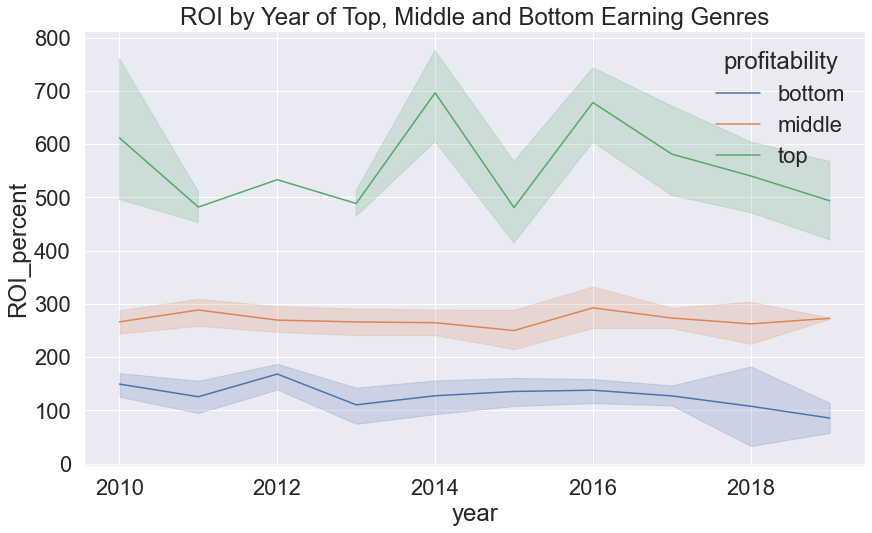

In [51]:
fig, ax = plt.subplots(figsize = (14,8))

sns.lineplot(data = df_ROI_by_genre_year, 
             x= 'year', y = 'ROI_percent', 
             hue = 'profitability').set_title('ROI by Year of Top, Middle and Bottom Earning Genres')
sns.set(font_scale = 2)

In [ ]:
fig, ax = plt.subplots(figsize = (14,8))

sns.lineplot(data = genre_ROI_timeseries, 
             x= 'year', y = 'ROI_percent', 
             hue = 'genres').set_title('ROI by year of Comedy, Horror and War Films')
sns.set(font_scale = 4)